# Circuit CS_R2CL

In [ ]:
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.plottools as pt
from villas.dataprocessing.timeseries import TimeSeries as ts

## The circuit model shows in below.

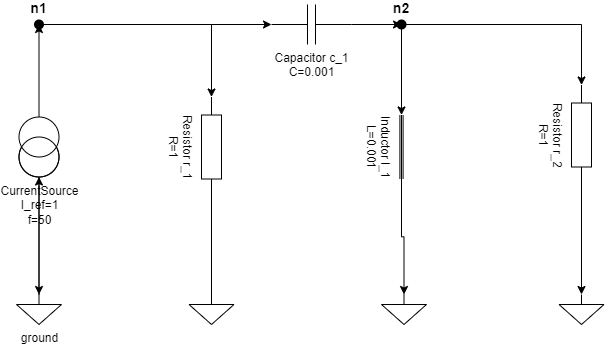

## DPsim EMT

In [ ]:
# DPsim EMT simulation
import dpsimpy

name = 'EMT_CS_R2CL'

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode('n1')
n2 = dpsimpy.emt.SimNode('n2')

# Components
cs = dpsimpy.emt.ph1.CurrentSource('cs')
cs.I_ref = complex(10, 0)
cs.f_src = 50
r1 = dpsimpy.emt.ph1.Resistor('r_1')
r1.R = 1
c1 = dpsimpy.emt.ph1.Capacitor('c_1')
c1.C = 0.001
l1 = dpsimpy.emt.ph1.Inductor('l_1')
l1.L = 0.001
r2 = dpsimpy.emt.ph1.Resistor('r_2')
r2.R = 1

# Connections
cs.connect([gnd, n1])
r1.connect([n1, gnd])
c1.connect([n1, n2]);
l1.connect([n2, gnd]);
r2.connect([n2, gnd]);

# Define system topology
system = dpsimpy.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2])

# Logging
logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1)
logger.log_attribute('n2.v', 'v', n2)
logger.log_attribute('cs.i_intf', 'i_intf', cs)
logger.log_attribute('c_1.i_intf', 'i_intf', c1)

sim = dpsimpy.Simulation(name)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_system(system)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)

In [ ]:
sim.add_logger(logger)

In [ ]:
sim.run()

In [ ]:
# read EMT results
work_dir = 'logs/'
log_name = 'EMT_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_emt = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

In [ ]:
v1_emt = 'n1.v'
v2_emt = 'n2.v'
i01_emt = 'cs.i_intf'
i12_emt = 'c_1.i_intf'

ts_dpsim_emt[v1_emt].label = 'v1 EMT'
ts_dpsim_emt[v2_emt].label = 'v2 EMT'
ts_dpsim_emt[i01_emt].label = 'i01 EMT'
ts_dpsim_emt[i12_emt].label = 'i12 EMT'
pt.plot_timeseries(1, ts_dpsim_emt[v1_emt])
pt.plot_timeseries(1, ts_dpsim_emt[v2_emt])
pt.plot_timeseries(2, ts_dpsim_emt[i01_emt])
pt.plot_timeseries(2, ts_dpsim_emt[i12_emt])

## DPsim DP

In [ ]:
# DPsim DP simulation
import dpsimpy

name = 'DP_CS_R2CL'

# Nodes
gnd = dpsimpy.dp.SimNode.gnd
n1 = dpsimpy.dp.SimNode('n1')
n2 = dpsimpy.dp.SimNode('n2')

# Components
cs = dpsimpy.dp.ph1.CurrentSource('cs')
cs.I_ref = complex(10,0)
r1 = dpsimpy.dp.ph1.Resistor('r_1');
r1.R = 1
c1 = dpsimpy.dp.ph1.Capacitor('c_1');
c1.C = 0.001
l1 = dpsimpy.dp.ph1.Inductor('l_1');
l1.L = 0.001
r2 = dpsimpy.dp.ph1.Resistor('r_2');
r2.R = 1

# Connections
cs.connect([gnd, n1])
r1.connect([n1, gnd])
c1.connect([n1, n2]);
l1.connect([n2, gnd]);
r2.connect([n2, gnd]);

# Define system topology
system = dpsimpy.SystemTopology(50, [gnd, n1, n2], [cs, r1, c1, l1, r2]);

# Logging
logger = dpsimpy.Logger(name)
logger.log_attribute('n1.v', 'v', n1)
logger.log_attribute('n2.v', 'v', n2)
logger.log_attribute('cs.i_intf', 'i_intf', cs)
logger.log_attribute('c_1.i_intf', 'i_intf', c1)

sim = dpsimpy.Simulation(name)
sim.set_system(system)
sim.set_domain(dpsimpy.Domain.DP)
sim.set_time_step(0.0001)
sim.set_final_time(0.1)

In [ ]:
sim.add_logger(logger)

In [ ]:
sim.run()

In [ ]:
# read DP results
work_dir = 'logs/'
log_name = 'DP_CS_R2CL'
print(work_dir + log_name + '.csv')

ts_dpsim_dp = rt.read_timeseries_dpsim(work_dir + log_name + '.csv')

#convert to emt
ts_dpsim_dp_emt = ts.frequency_shift_list(ts_dpsim_dp, 50)

In [ ]:
v1_dp = 'n1.v_shift'
v2_dp = 'n2.v_shift'
i01_dp = 'cs.i_intf_shift'
i12_dp = 'c_1.i_intf_shift'

ts_dpsim_dp_emt[v1_dp].label = 'v1 DP'
ts_dpsim_dp_emt[v2_dp].label = 'v2 DP'
ts_dpsim_dp_emt[i01_dp].label = 'i01 DP'
ts_dpsim_dp_emt[i12_dp].label = 'i12 DP'
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1_dp])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v2_dp])
pt.plot_timeseries(2, ts_dpsim_dp_emt[i01_dp])
pt.plot_timeseries(2, ts_dpsim_dp_emt[i12_dp])

## Simulink reference results

In [ ]:
# read Simulink log file
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/Circuits/SL_CS_R2CL.csv'
local_file = 'reference-results/SL_CS_R2CL.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl = rt.read_timeseries_simulink(local_file)

In [ ]:
v1_sl = 'v1'
v2_sl = 'v2'
i01_sl = 'i12'
i12_sl = 'i34'

ts_sl[v1_sl].label = 'v1 SL'
ts_sl[v2_sl].label = 'v2 SL'
ts_sl[i01_sl].label = 'i01 SL'
ts_sl[i12_sl].label = 'i12 SL'
pt.plot_timeseries(1, ts_sl[v1_sl])
pt.plot_timeseries(1, ts_sl[v2_sl])
pt.plot_timeseries(2, ts_sl[i01_sl])
pt.plot_timeseries(2, ts_sl[i12_sl])

## Comparison

In [ ]:
# plot v1
pt.plot_timeseries(1, ts_dpsim_emt[v1_emt])
pt.plot_timeseries(1, ts_dpsim_dp_emt[v1_dp])
pt.plot_timeseries(1, ts_dpsim_dp['n1.v'].abs())
pt.plot_timeseries(1, ts_sl[v1_sl])
# plot v2
pt.plot_timeseries(2, ts_dpsim_emt[v2_emt])
pt.plot_timeseries(2, ts_dpsim_dp_emt[v2_dp])
pt.plot_timeseries(2, ts_sl[v2_sl])
# plot i01
pt.plot_timeseries(5, ts_dpsim_emt[i01_emt])
pt.plot_timeseries(5, ts_dpsim_dp_emt[i01_dp])
pt.plot_timeseries(5, ts_sl[i01_sl])
# plot i12
pt.plot_timeseries(6, ts_dpsim_emt[i12_emt])
pt.plot_timeseries(6, ts_dpsim_dp_emt[i12_dp])
ts_i12_sl = ts_sl[i12_sl].scale(-1)
ts_i12_sl.label = '-i12 SL'
pt.plot_timeseries(6, ts_i12_sl)

In [ ]:
# calculate the RMSE between Simulink (ts_sl) and EMT (ts_dpsim_emt)
err_sl_emt = 0
err_sl_emt += ts.rmse(ts_sl[v1_sl], ts_dpsim_emt[v1_emt])
err_sl_emt += ts.rmse(ts_sl[v2_sl], ts_dpsim_emt[v2_emt])
err_sl_emt = err_sl_emt / 2
print("Total RMSE of Simulink reference and DPsim EMT: %g" % (err_sl_emt))

# calculate the RMSE between Simulink (ts_sl) and DP (ts_dpsim_dp_emt)
err_sl_dp = 0
err_sl_dp += ts.rmse(ts_sl[v1_sl], ts_dpsim_dp_emt[v1_dp])
err_sl_dp += ts.rmse(ts_sl[v2_sl], ts_dpsim_dp_emt[v2_dp])
err_sl_dp = err_sl_dp / 2
print("Total RMSE of Simulink reference and DPsim DP: %g" % (err_sl_dp))

In [ ]:
assert err_sl_emt < 0.1
assert err_sl_dp < 0.1